# Simple Even Odd Distinction

Let's look at another example where we will pass any number to our graph, and our graph will decide if it's an even number or an odd number

**Install LangGraph:**

In [ ]:
%%capture --no-stderr
%pip install -qU langgraph

**Defining State:**

In [ ]:
from typing import TypedDict

class State(TypedDict):
    number: int
    message: str

The State class is a TypedDict defining the structure of our state object. Here, State has two keys:
* **number:** The input number to check (whether it’s even or odd).
* **message:** A string to hold messages for confirmation or results.

In [ ]:
# Node-1: Confirms the entered number
def node_1(state: State):
    return {"number": state['number'], "message": f"Your entered number is: {state['number']}"}

# Node-2: For even number
def even_node(state: State):
    return {"number": state['number'], "message": f"Your entered number is: {state['number']}. This is an even number."}

# Node-3: For odd number
def odd_node(state: State):
    return {"number": state['number'], "message": f"Your entered number is: {state['number']}. This is an odd number."}

**node_1:** The first node, which confirms the entered number and creates a message confirming the number input.

**even_node:** This node outputs a message stating the number is even.

**odd_node:** This node outputs a message stating the number is odd.

**Conditional Function decide_even_odd:**

In [ ]:
from typing import Literal

# Conditional logic for deciding even or odd
def decide_even_odd(state: State)-> Literal['even_node','odd_node']:
    if state['number'] % 2 == 0:
        return 'even_node'
    return 'odd_node'

This function decides the next node based on the parity of number.
If number is even, it returns 'even_node'; otherwise, it returns 'odd_node'.

**Building the Graph (builder):**

In [ ]:
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image

# Build the graph
builder:StateGraph = StateGraph(State)

# Add nodes to the graph
builder.add_node("node_1", node_1)          # Node to display the entered number
builder.add_node("even_node", even_node)    # Node for even numbers
builder.add_node("odd_node", odd_node)      # Node for odd numbers

# Define edges

# Start the flow at node_1
builder.add_edge(START, "node_1")

# Add conditional edge to decide between even_node and odd_node
builder.add_conditional_edges("node_1", decide_even_odd)

# After deciding, proceed to END
builder.add_edge("even_node", END)
builder.add_edge("odd_node", END)

# Compile the graph again after making these changes
graph = builder.compile()

**Displaying the Graph:**

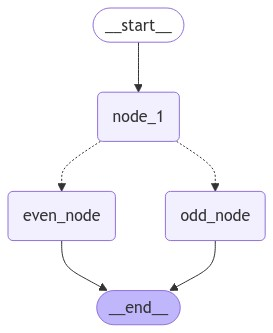

In [ ]:
# Display the Graph
from langchain_core.runnables.graph import MermaidDrawMethod

display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [ ]:
# Invoke the graph with an example number and an empty message
result = graph.invoke({"number": 22, "message": ""})

# Output the final result, check for message
if 'message' in result:
    print(result['message'])  # Expected output: "Your entered number is: {number}. This is an odd number."
else:
    print("Message key not found in the result.")

Your entered number is: 22. This is an even number.
